In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
top_100_above_1000 = pd.read_csv('Halos/merged/top_100_merged_above_1000.csv')

In [39]:
top_100_above_1000.dtypes

Unnamed: 0                             int64
Unnamed: 0_orig                        int64
Unnamed: 0_comp                        int64
mag_diff_orig                        float64
mag_diff_comp                        float64
fof_halo_count_orig                    int64
fof_halo_count_comp                    int64
fof_halo_tag_orig                      int64
fof_halo_tag_comp                      int64
fof_halo_mass_orig                   float64
fof_halo_mass_comp                   float64
fof_halo_ke_orig                     float64
fof_halo_ke_comp                     float64
fof_halo_center_x_orig               float64
fof_halo_center_x_comp               float64
fof_halo_center_y_orig               float64
fof_halo_center_y_comp               float64
fof_halo_center_z_orig               float64
fof_halo_center_z_comp               float64
fof_halo_angmom_x_orig               float64
fof_halo_angmom_x_comp               float64
fof_halo_angmom_y_orig               float64
fof_halo_a

In [4]:
haloID = 944404240

In [7]:
halo = top_100_above_1000[top_100_above_1000['fof_halo_tag_orig']==haloID]

In [8]:
halo

,Unnamed: 0,Unnamed: 0_orig,Unnamed: 0_comp,mag_diff_orig,mag_diff_comp,fof_halo_count_orig,fof_halo_count_comp,fof_halo_tag_orig,fof_halo_tag_comp,fof_halo_mass_orig,...,fof_halo_angmom_dx_orig,fof_halo_angmom_dx_comp,fof_halo_angmom_dy_orig,fof_halo_angmom_dy_comp,fof_halo_angmom_dz_orig,fof_halo_angmom_dz_comp,fof_halo_angmom_mag_orig,fof_halo_angmom_mag_comp,fof_halo_specific_angmom_mag_orig,fof_halo_specific_angmom_mag_comp
2,2,2,2,0.494269,0.494269,13913,13913,944404240,944404240,7.633143e+12,...,0.926759,0.934126,-0.043094,0.236213,0.373176,0.267604,3.386228e+12,4.577252e+12,0.443622,0.599655


In [79]:
mass_per_particle = float(halo['fof_halo_mass_orig']/halo['fof_halo_count_orig'])
print('%e'%mass_per_particle)

5.486339e+08


In [26]:
orig = pd.read_csv('HaloParticles/big/944404240_orig.csv')
comp = pd.read_csv('HaloParticles/big/944404240_PosNoComp_vel_.01.csv')
particles = {}
particles['orig'] = orig
particles['comp'] = comp

In [40]:
orig.dtypes

x               float64
y               float64
z               float64
vx              float64
vy              float64
vz              float64
id              float64
fof_halo_tag    float64
dtype: object

In [27]:
(np.abs(orig['id'] - comp['id'])).sum()

0.0

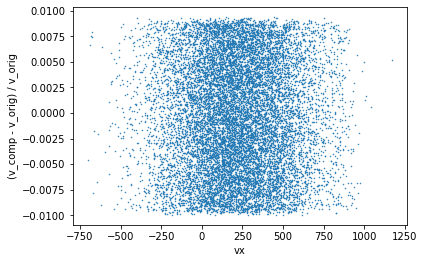

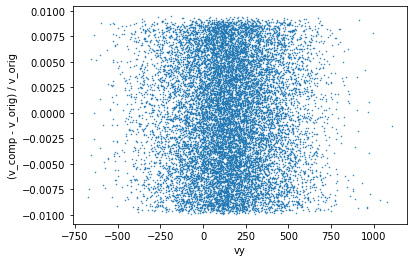

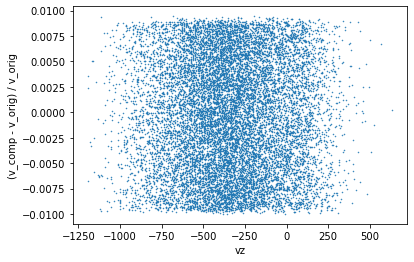

In [31]:
for v in ['vx','vy','vz']:
    vo = orig[v]
    vc = comp[v]
    plt.plot(vo,(vc - vo)/vo,'.',markersize=1)
    plt.xlabel(v)
    plt.ylabel('(v_comp - v_orig) / v_orig')
    plt.show()

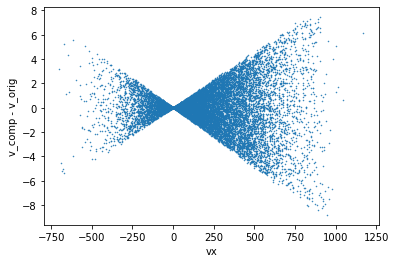

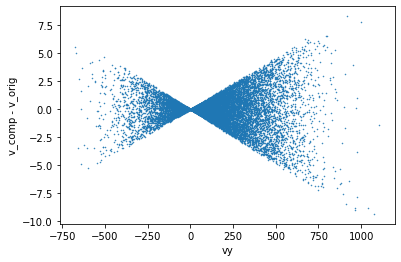

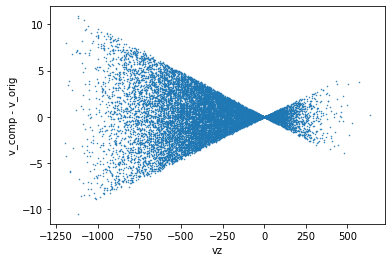

In [32]:
for v in ['vx','vy','vz']:
    vo = orig[v]
    vc = comp[v]
    plt.plot(vo,vc - vo,'.',markersize=1)
    plt.xlabel(v)
    plt.ylabel('v_comp - v_orig')
    plt.show()

In [85]:
posArr_orig = (np.array([orig['x'],orig['y'],orig['z']])).transpose()
posArr_comp = (np.array([comp['x'],comp['y'],comp['z']])).transpose()
velArr_orig = (np.array([orig['vx'],orig['vy'],orig['vz']])).transpose()
velArr_comp = (np.array([comp['vx'],comp['vy'],comp['vz']])).transpose()

In [69]:
def mean(arr):
    return arr.sum(0)/arr.shape[0]

In [70]:
for d in ['x','y','z']:
    print(d)
    for p in ['orig','comp']:
        print(p)
        k = 'fof_halo_com_' + d + '_' + p
        haloVal = float(halo[k])
        dArr = particles[p][d]
        partVal = mean(dArr)
        print(haloVal)
        print(partVal)
        print(partVal/haloVal - 1.0)

x
orig
231.59295654296875
231.59295395797875
-1.1161781610091737e-08
comp
231.59295654296875
231.59295395797875
-1.1161781610091737e-08
y
orig
171.4563446044922
171.45634135378776
-1.8959370851057145e-08
comp
171.4563446044922
171.45634135378776
-1.8959370851057145e-08
z
orig
187.0282745361328
187.02826868837437
-3.1266708000465826e-08
comp
187.0282745361328
187.02826868837437
-3.1266708000465826e-08


In [86]:
mean(posArr_orig)

array([231.59295396, 171.45634135, 187.02826869])

In [87]:
mean(posArr_comp)

array([231.59295396, 171.45634135, 187.02826869])

In [71]:
for d in ['x','y','z']:
    v = 'v'+d
    print(v)
    for p in ['orig','comp']:
        print(p)
        k = 'fof_halo_mean_' + v + '_' + p
        haloVal = float(halo[k])
        dArr = particles[p][v]
        partVal = mean(dArr)
        print(haloVal)
        print(partVal)
        print(partVal/haloVal - 1.0)

vx
orig
215.8330993652344
215.83310444399203
2.3530948967120935e-08
comp
215.76119995117188
215.7612073980875
3.451461894066199e-08
vy
orig
147.7826385498047
147.78263650625846
-1.3828053480047231e-08
comp
147.73341369628906
147.73341546429046
1.1967511870381031e-08
vz
orig
-341.1533203125
-341.1533200658849
-7.228864173924876e-10
comp
-341.0271301269531
-341.0271394056287
2.7208027608693897e-08


In [88]:
mean(velArr_orig)

array([ 215.83310444,  147.78263651, -341.15332007])

In [89]:
mean(velArr_comp)

array([ 215.7612074 ,  147.73341546, -341.02713941])

In [47]:
np.cross(np.array([[1,0,0],[0,1,0]]),np.array([[0,1,0],[0,0,1]]))

array([[0, 0, 1],
       [1, 0, 0]])

In [84]:
for p in ['orig','comp']:
    print(p)
    for d in ['x','y','z']:
        k = 'fof_halo_angmom_' + d + '_' + p
        print('%e'%float(halo[k]))

orig
3.138218e+12
-1.459259e+11
1.263658e+12
comp
4.275731e+12
1.081207e+12
1.224891e+12


In [94]:
(np.cross(posArr_orig - mean(posArr_orig),velArr_orig - mean(velArr_orig))).sum(0)*mass_per_particle

array([4.38365264e+13, 4.70850806e+13, 1.25976123e+13])

In [95]:
(np.cross(posArr_comp - mean(posArr_comp),velArr_comp - mean(velArr_comp))).sum(0)*mass_per_particle

array([4.38384858e+13, 4.71223436e+13, 1.25872293e+13])

In [90]:
posArr_orig

array([[231.18821716, 171.41067505, 186.94265747],
       [231.18927002, 171.42144775, 186.94497681],
       [231.21090698, 171.42904663, 186.93077087],
       ...,
       [232.06903076, 171.26512146, 187.18513489],
       [232.0708313 , 171.33010864, 187.16372681],
       [232.08303833, 171.26202393, 187.16529846]])

In [91]:
posArr_orig - mean(posArr_orig)

array([[-0.40473679, -0.0456663 , -0.08561122],
       [-0.40368394, -0.0348936 , -0.08329188],
       [-0.38204698, -0.02729472, -0.09749781],
       ...,
       [ 0.4760768 , -0.19121989,  0.1568662 ],
       [ 0.47787734, -0.12623271,  0.13545812],
       [ 0.49008437, -0.19431743,  0.13702977]])